# Regrassão Linear Múltipla Y ~ X1 + X2 + Xn
* Duas os mais variáveis explanatórias para prever uma variável dependente

# Como analisar as variáveis
* Analisar cada variável independente com Y individualmente
* Gerar gráficos de dispersão individuais
* Buscar redundâncias na relação entre as variáveis explanatórias e a variável dependente

# Colinariedade e Parcimônia
* Colinariedade: são duas variáveis independentes que são correlacionadas,  que podem prejudicar o modelo
* Parcimônia: criar modelos excluindo variávis que não melhorem o modelo 

# Requisitos básicos
* Linearidade entre a variável dependente e as variáveis independentes
* As variáveis independentes sejam normalmente distribuídas
* Pouca ou nenhuma colinariedade

# Residuais
* Próximo a distribuição normal
* Variância constante em relação a linha de melhor ajuste 
* as variáveis independentes devem sr independentes entre si   


# Dataset: mtcars. 
* Os dados foram extraídos da revista Motor Trend US de 1974 e abrangem o consumo de combustível e 10 aspectos do design e desempenho de automóveis para 32 automóveis (modelos de 1973-74).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
import statsmodels.formula.api as sm

In [7]:
data = pd.read_csv('datasets/mtcars.csv')
data

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [10]:
data.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [11]:
data.shape

(32, 12)

In [14]:
data = data.set_index('model')

In [15]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [16]:
x = data.iloc[:,2].values
y = data.iloc[:,0].values

## Modelo de Regressão Linear Simples: mpg (consumo por milhas) e disp (polegadas cúbicas)
* Buscar a correlação entre as 4 primiras variáveis
* Apresenta forte correlação negativa

In [21]:
corr = np.corrcoef(x,y)
corr

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [22]:
x = x.reshape(-1,1)

In [23]:
modelo = lr()
modelo.fit(x,y)

LinearRegression()

In [24]:
modelo.intercept_

29.59985475616395

In [27]:
modelo.coef_

array([-0.04121512])

# Coeficiente de determinação

In [28]:
modelo.score(x,y)

0.7183433404897299

# Coeficiente de determinação ajustado

In [33]:
prev = modelo.predict(x)
modelo_ajust = sm.ols(formula='mpg ~ disp', data=data)
modelo_treino = modelo_ajust.fit() 
modelo_treino.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           9.38e-10
Time:                        17:25:42   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

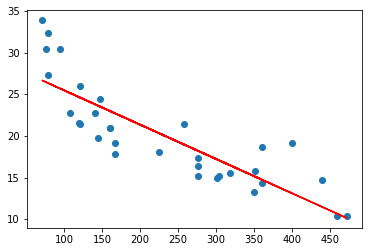

In [36]:
plt.scatter(x,y);
plt.plot(x, prev, color='r');

# Previsão com regressão simples

In [38]:
modelo.predict([[200]])

array([21.35683076])

# Previsão com regressão múltipla

In [40]:
x1 = data.iloc[:,1:4].values
modelo2 = lr()
modelo2.fit(x1, y)

LinearRegression()

In [41]:
modelo2.score(x1,y)

0.7678877440928638

In [42]:
#Demonstra que a inclusão das variáveis melhorou o modelo 
modelo_ajust2 = sm.ols(formula='mpg ~ cyl+disp+hp', data=data)
modelo_treino2 = modelo_ajust2.fit() 
modelo_treino2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           5.05e-09
Time:                        17:37:08   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
novo = np.array([4,200,100])
novo = novo.reshape(1, -1)
novo

array([[  4, 200, 100]])

In [48]:
modelo2.predict(novo)

array([24.03968887])